# SKlearn

In [180]:
# Loading data
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Auto.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of data frame: (392, 9)


In [181]:
# Data formatting and printing the new dimensions
df = df.dropna()
print('Dimensions of data frame after removing NAs',df.shape)

Dimensions of data frame after removing NAs (389, 9)


In [182]:
# Convert data to compute correct type and then describe
df = df.astype({'mpg':'int','displacement':'int','horsepower':'int','weight':'int','acceleration':'int','year':'int','name':'category'})
df['mpg'].describe()

count    389.000000
mean      23.326478
std        7.756862
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.000000
Name: mpg, dtype: float64

In [183]:
df['weight'].describe()

count     389.000000
mean     2973.871465
std       849.289375
min      1613.000000
25%      2223.000000
50%      2800.000000
75%      3613.000000
max      5140.000000
Name: weight, dtype: float64

In [184]:
df['year'].describe()

count    389.000000
mean      76.025707
std        3.660088
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

**Range** <br/>
The range of each of these columns follows, mpgs is 9:46, weight is 1613:5140 and year is is 70:82

In [185]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
df.dtypes

mpg                int64
cylinders           int8
displacement       int64
horsepower         int64
weight             int64
acceleration       int64
year               int64
origin          category
name            category
dtype: object

In [186]:
import numpy as np
df['mpg_high'] = np.where(df['mpg'] > 23.326478, 1, 0)
df.drop('mpg', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4           307         130    3504            12    70      1   
1          4           350         165    3693            11    70      1   
2          4           318         150    3436            11    70      1   
3          4           304         150    3433            12    70      1   
6          4           454         220    4354             9    70      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


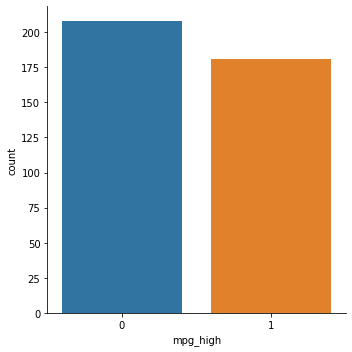

In [187]:
import seaborn as sns
from matplotlib import pyplot as pl

sns.catplot(data=df,x='mpg_high',kind='count')

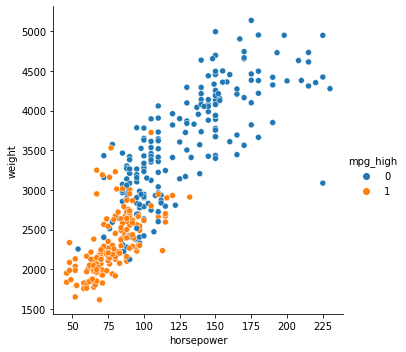

In [188]:
sns.relplot(data=df,x='horsepower',y='weight',hue='mpg_high')

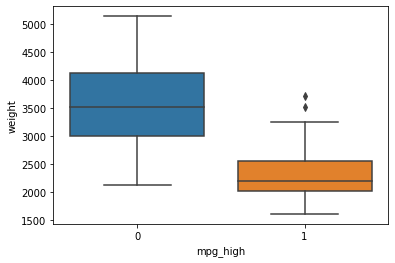

In [189]:
sns.boxplot(data=df,x='mpg_high',y='weight')

One could assume from a given dataset that an even amount of samples would appear on either side of the mean. But with this dataset we see that there are in fact more cars with a lower mpg than the average. From the second graph we can observe that the less efficient cars are typically heavier and have higher horsepower. Inefficient cars also had a higher variance as seen from the third graph, explaining the uneven split relative to the mean.

In [190]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print('Dimensions of train: ',X_train.shape)
print('Dimensions of test: ',X_test.shape)

Dimensions of train:  (311, 7)
Dimensions of test:  (78, 7)


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(solver='lbfgs', random_state=1234)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

pred = lr.predict(X_test)

print('Classification Report:\n',classification_report(y_test,pred),'\nConfusion Matrix:')

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88        51
           1       0.72      0.96      0.83        27

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78
 
Confusion Matrix:


In [192]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

print('Classification Report:\n',classification_report(y_test,pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.83      0.93      0.88        27

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.92      0.91      0.91        78



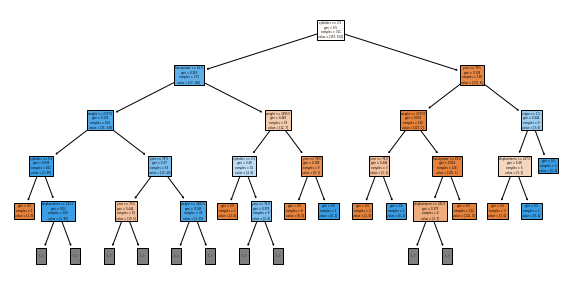

In [193]:
from matplotlib import pyplot as plt
import sklearn.tree
import graphviz

fig = plt.figure(figsize=(10,5))
plot = tree.plot_tree(dt, feature_names=df.columns, filled=True, max_depth = 4)
fig.savefig("decision_tree.png")

In [194]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn1 = MLPClassifier(hidden_layer_sizes=(7,2), max_iter=500, random_state=1234)
nn2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,3), max_iter=500, random_state=1234)
nn1.fit(X_train_scaled, y_train)
nn2.fit(X_train_scaled, y_train)
pred1 = nn1.predict(X_test_scaled)
pred2 = nn2.predict(X_test_scaled)

print('Accuracy of First Model: ',accuracy_score(y_test,pred1))
print('Accuracy of Second Model: ',accuracy_score(y_test,pred2))

Accuracy of First Model:  0.8717948717948718
Accuracy of Second Model:  0.8846153846153846


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:641: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  intercept_grads,


Different layer sizes did not effect the accuracy as much as the solver did. Granted the solver only bumped the performance by 1% when going from adam to lbfgs solver. The accuracy seems to be slightly less than the decision tree given the fact that we don't have too many values to predict with. These accuracy changes could be tied to overfitting when compared to decision trees.

## Summary

Out of all three algorithsm tested, Decision Tree Algorithm performed the best. Logistic Regression got a decent accuracy at 89%, Decision Trees at 92%, and Neural Network at 88%. I believe Decision Tree performed the best due to the size of the dataset and how many parameters it has. Neural Networks typically shine where there are lots of parameters and smaller data sets to prevent overfitting. Logistic Regression struggled with nuance in the data, and could not fit to the curves of the data.

I prefer Python over R, it's a lot easier to read and there's less technical jargon in terms of syntax. Instead of using 20 different symbols to specify what I'm targeting within a dataframe I can use a function and pass parameters. Python libraries also have great documentation and more flexibility when it comes to plotting.